# Tennessee Eastman Process Fault Analysis

The Tennessee Eastman Process was first presented by [Downs and Vogel](http://users.abo.fi/khaggblo/RS/Downs.pdf) in 1993 and has since become a benchmark for industrial process analytics. Over 1000 papers have used the Tennessee Eastman Process to test control, fault detection, fault diagnosis, and other algorithms on a realistic system. Data from the process simulation, as well as Matlab, C, and Fortran code to run the simulation, is hosted by the [University of Washington](https://depts.washington.edu/control/LARRY/TE/download.html).

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import diffusion_maps as dmaps
import scipy.stats as sps
sns.set_context('notebook')
sns.set_style('ticks')
cmap = plt.get_cmap("viridis")
import scipy.spatial as spsp
blue = sns.color_palette()[0]
green = sns.color_palette()[1]
red = sns.color_palette()[2]
%matplotlib notebook
np.random.seed(seed=20)

### Load the data
* The process response to a random variation in one of the feed compositions is time series data
* The data are loaded into a Pandas Dataframe using the variable names provided by Downs and Vogel and indexed by time
* The measured variables and manipulated variables (driven by automatic controllers) are of primary interest

In [2]:
Time = np.loadtxt('data/idv8/t.dat')[:,0] # other columns are dummy variables
Measured = np.loadtxt('data/idv8/y.dat')
Manipulated = np.loadtxt('data/idv8/u.dat')
Reference = np.loadtxt('data/idv8/r.dat')         

### Individual Time Series
* The data represent measurements or actuator signals sampled at each time step
* As they refer to different physical variables, they naturally have different means and ranges
* As they are collected from the same process, common features such as oscillations can be observed between variables

<IPython.core.display.Javascript object>


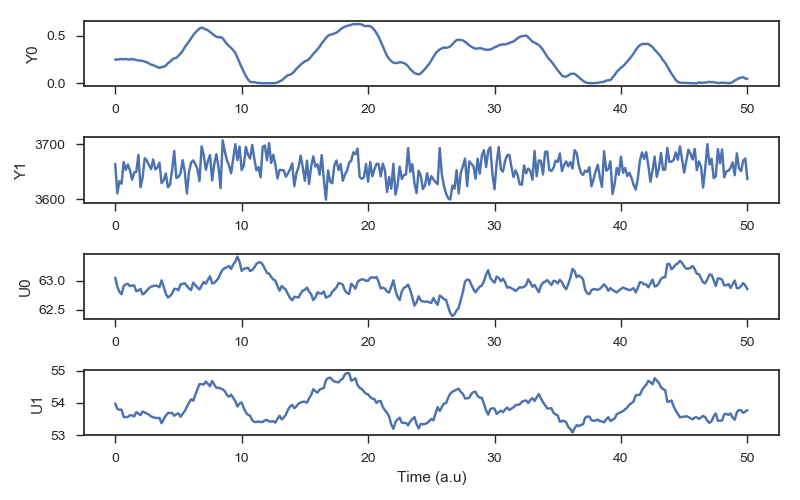

In [3]:
# Time series plots of several individual variables
plt.figure(figsize=(8,5))
plt.subplot(4,1,1)
plt.plot(Time, Measured.T[0])
plt.ylabel('Y0')
plt.subplot(4,1,2)
plt.plot(Time, Measured.T[1])
plt.ylabel('Y1')
plt.subplot(4,1,3)
plt.plot(Time, Manipulated.T[0])
plt.ylabel('U0')
plt.subplot(4,1,4)
plt.plot(Time, Manipulated.T[1])
plt.ylabel('U1')
plt.xlabel('Time (a.u)')
plt.tight_layout()


<IPython.core.display.Javascript object>


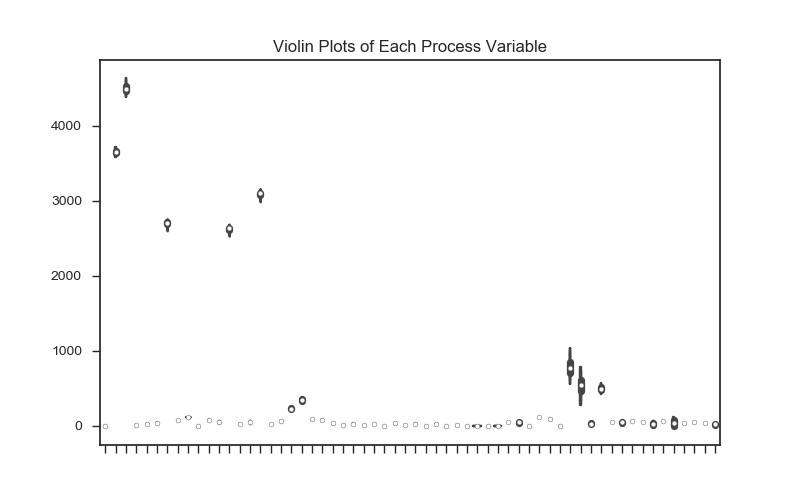

/home/robert/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:2342: UserWarning: The violinplot API has been changed. Attempting to adjust your arguments for the new API (which might not work). Please update your code. See the version 0.6 release notes for more info.
  warnings.warn(msg, UserWarning)
/home/robert/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/home/robert/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)
/home/robert/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which wil

In [4]:
# Collect variables of interest
Data = np.hstack([Measured, Manipulated]) 

# identify and remove variables with negligible variance
var = np.std(Data, axis=0)**2 
Data = Data[:,var>1e-5]
nvar = np.shape(Data)[1]

# Plot distribution for variables before standardizing
plt.figure(figsize=(8,5))
ax = sns.violinplot(pd.DataFrame(Data))
ax.set_xticklabels([])
ax.set_title('Violin Plots of Each Process Variable')

# Standardize data
Data = sps.zscore(Data)

<IPython.core.display.Javascript object>


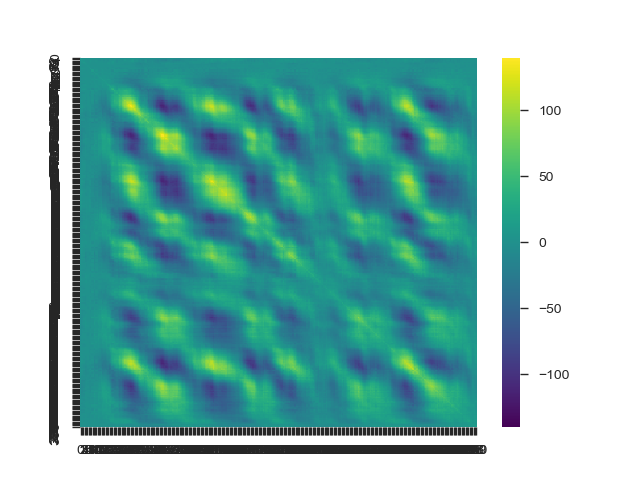

In [6]:
# plot the covariance matrix
cov = Data @ Data.T
plt.figure()
sns.heatmap(cov, cmap=cmap)

[s, v ,d] = np.linalg.svd(Data)

<IPython.core.display.Javascript object>


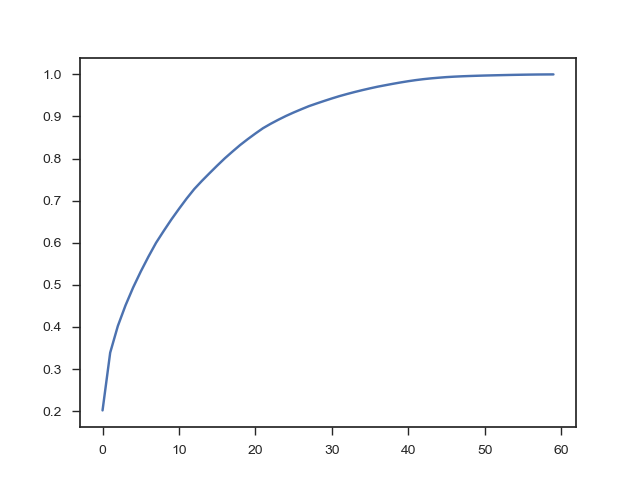

In [15]:
plt.figure()
plt.plot(np.cumsum(v/sum(v)))